In [1]:
from tqdm import tqdm
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt


from numpy import asarray
from numpy import save

In [2]:
train_df = pd.read_csv('aptos2019-blindness-detection/train.csv')
test_df = pd.read_csv('aptos2019-blindness-detection/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
id_code    1928 non-null object
dtypes: object(1)
memory usage: 15.2+ KB


In [6]:
train_df.head(10)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1


In [7]:
test_df.head(10)

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
5,009c019a7309
6,010d915e229a
7,0111b949947e
8,01499815e469
9,0167076e7089


In [25]:
IMG_SIZE= 128


num_channels = 3 # canales, rgb, escala de grises
xtrain = np.zeros((1928, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)


for i, image_id in enumerate(tqdm(test_df['id_code'])):
    image = cv2.imread(f'aptos2019-blindness-detection/test-128c/{image_id}.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xtrain[i,:,:,:] = image

100%|██████████| 1928/1928 [00:07<00:00, 265.01it/s]


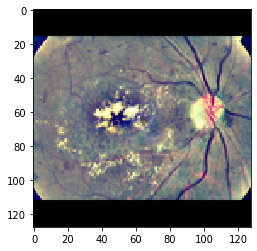

In [26]:
plt.imshow(xtrain[1])

In [27]:
from numpy import asarray
from numpy import save

data = asarray(xtrain)
save('aptos2019-blindness-detection/numpy files/test128c.npy', data)